<a href="https://colab.research.google.com/github/Mehpara/Datasets/blob/main/DS2_%2CDS_3_LR%2C_SVC%2C_SDG_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-multilearn
!pip install simplekml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 6.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.7 MB/s 
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65876 sha256=b84624d905ced830b35be6dc6e9fe580592c057fb6dc156a153bd2bcbd5c2c9a
  Stored in directory: /root/.cache/pip/wheels/5c/ec/e6/10af1a1fb29ffca95151d4c886d6e06fc309c68f46519892de
Successfully built simplekml


In [2]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
#/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
import pandas.util.testing as tm
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split

# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs

from skmultilearn.adapt import MLkNN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [3]:
# Load Dataset 2
df = pd.read_csv("https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Multi_Label_Text_Classification_with_Skmultilearn/data/so_dataset_2_tags.csv")
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [4]:
# Convert to Float
df['mysql'] = df['mysql'].astype(float)
df.dtypes

title      object
tags       object
mysql     float64
python    float64
php       float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


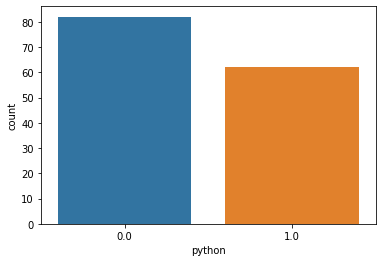

In [5]:
# Value Count 
sns.countplot(df['python'])

In [6]:
#Text Preprocessing    neattext : remove_stopwords  
!pip install neattext
import neattext as nt
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 15.2 MB/s 


In [7]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

In [8]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [9]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
# Explore For Noise
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [11]:
corpus = df['title'].apply(nfx.remove_stopwords)

In [12]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

In [13]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
y = df[['mysql', 'python', 'php']]
y

,mysql,python,php
0,1.0,1.0,0.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
139,1.0,1.0,0.0
140,1.0,1.0,0.0
141,1.0,0.0,1.0
142,1.0,0.0,1.0


In [16]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)
print(df['title'].shape)
print(X_train.shape)

(144,)
(100, 404)


In [18]:
# Building Our Model
import skmultilearn
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'utils']

In [31]:
from sklearn.multiclass import OneVsRestClassifier
sgd=SGDClassifier()
lr=LogisticRegression(solver='lbfgs')
svc=LinearSVC()



In [32]:
def j_score(y_true,y_pred): 
  jaccard = np.minimum(y_true, y_pred).sum(axis=1)/np.maximum(y_true, y_pred).sum(axis=1)
  return jaccard.mean()*100

In [33]:
def print_score(y_pred, clf):
  print("clf:", clf.__class__.__name__)
  print('jaccard score: {}'.format(j_score(y_test, y_pred)))
  print('...................................')

In [36]:
for classifier in [svc]:
  clf=OneVsRestClassifier(classifier)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)


print("hamming loss: ")
print(hamming_loss(y_test, y_pred))

print("accuracy:")
print(accuracy_score(y_test, y_pred))

print("f1 score:")
print("micro")
print(f1_score(y_test, y_pred, average='micro'))
print("macro")
print(f1_score(y_test, y_pred, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, y_pred, average='micro'))
print("macro")
print(precision_score(y_test, y_pred, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, y_pred, average='micro'))
print("macro")
print(recall_score(y_test, y_pred, average='macro'))


print_score(y_pred, classifier)

hamming loss: 
0.23484848484848486
accuracy:
0.29545454545454547
f1 score:
micro
0.7862068965517242
macro
0.6338383838383839
precision:
micro
1.0
macro
1.0
recall:
micro
0.6477272727272727
macro
0.527719298245614
clf: LinearSVC
jaccard score: 64.77272727272727
...................................


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


In [34]:
for classifier in [lr]:
  clf=OneVsRestClassifier(classifier)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)


print("hamming loss: ")
print(hamming_loss(y_test, y_pred))

print("accuracy:")
print(accuracy_score(y_test, y_pred))

print("f1 score:")
print("micro")
print(f1_score(y_test, y_pred, average='micro'))
print("macro")
print(f1_score(y_test, y_pred, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, y_pred, average='micro'))
print("macro")
print(precision_score(y_test, y_pred, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, y_pred, average='micro'))
print("macro")
print(recall_score(y_test, y_pred, average='macro'))


print_score(y_pred, classifier)

hamming loss: 
0.09090909090909091
accuracy:
0.8181818181818182
f1 score:
micro
0.9302325581395349
macro
0.8990384615384616
precision:
micro
0.9523809523809523
macro
0.9506172839506174
recall:
micro
0.9090909090909091
macro
0.8680701754385964
clf: LogisticRegression
jaccard score: 89.39393939393938
...................................


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


In [35]:
for classifier in [sgd]:
  clf=OneVsRestClassifier(classifier)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)


print("hamming loss: ")
print(hamming_loss(y_test, y_pred))

print("accuracy:")
print(accuracy_score(y_test, y_pred))

print("f1 score:")
print("micro")
print(f1_score(y_test, y_pred, average='micro'))
print("macro")
print(f1_score(y_test, y_pred, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, y_pred, average='micro'))
print("macro")
print(precision_score(y_test, y_pred, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, y_pred, average='micro'))
print("macro")
print(recall_score(y_test, y_pred, average='macro'))


print_score(y_pred, classifier)

hamming loss: 
0.26515151515151514
accuracy:
0.5227272727272727
f1 score:
micro
0.8044692737430168
macro
0.7414080747414081
precision:
micro
0.7912087912087912
macro
0.8007936507936507
recall:
micro
0.8181818181818182
macro
0.7782456140350877
clf: SGDClassifier
jaccard score: 72.72727272727273
...................................


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
